# SMS Spam Classification Dataset Exploration

## Import Libraries

In [40]:
import nltk
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [16]:
# !pip install wordcloud
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anu52\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anu52\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anu52\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Exploration

In [24]:
# load dataset
df = pd.read_csv('data/spam.csv', encoding='latin-1')

# top five records of the dataset
df.head() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# null values in the dataset
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Conclusion: From above output, we are able to conclude that dataset columns [Unnamed: 2,3 and 4] has almost 99% null or missing values. So, we remove or drop all these columns from our dataframe for further analysis.

In [25]:
# drop the columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [26]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# change column names
df.columns = ['label', 'message']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# shape of the dataframe
df.shape

(5572, 2)

In [11]:
# dataframe discription
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
# make a column to check the length of the message
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Text-Preprocessing

In [29]:
# Tokenization
df['tokens'] = df['message'].apply(word_tokenize)

In [30]:
# Removing stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item.lower() not in stop_words])

In [31]:
# Join tokens into a single string
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

In [32]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

# Tokenize the text column and then apply the lemmatizer
df['tokens'] = df['tokens'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(x)]))

In [34]:
df['tokens'] = df['tokens'].apply(lambda x: x.lower())
df.head()

,label,message,length,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go jurong point , crazy .. available bugis n g..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar ... joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor ... u c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah n't think go usf , life around though"


In [35]:
# creating a function remove the punctuation marks from the text
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Convert text into list of words/tokens
    tokens = nopunc.split()
    return tokens

In [36]:
df['tokens'] = df['tokens'].apply(text_process)

,label,message,length,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, nt, think, go, usf, life, around, though]"


In [37]:
df['message'] = df['tokens'].apply(lambda x: ' '.join(x))
df.head()

,label,message,length,tokens
0,ham,go jurong point crazy available bugis n great ...,111,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,29,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say early hor u c already say,49,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah nt think go usf life around though,61,"[nah, nt, think, go, usf, life, around, though]"


In [39]:
df.describe(include='object')

,label,message,tokens
count,5572,5572,5572
unique,2,5114,5114
top,ham,sorry ll call later,"[sorry, ll, call, later]"
freq,4825,30,30


## Data Visualization

In [47]:
# distribution of label column using pie chart
fig = px.pie(df, names='label', title='Distribution of label column')
fig.show()

([<matplotlib.patches.Wedge at 0x2c996630ca0>,
 [Text(-0.44971325876899215, -1.0038714981945516, 'ham'),
  Text(0.4905963335602993, 1.095132520518495, 'spam')],
 [Text(-0.24529814114672294, -0.5475662717424826, '86.6%'),
  Text(0.2861811945768412, 0.6388273036357887, '13.4%')])

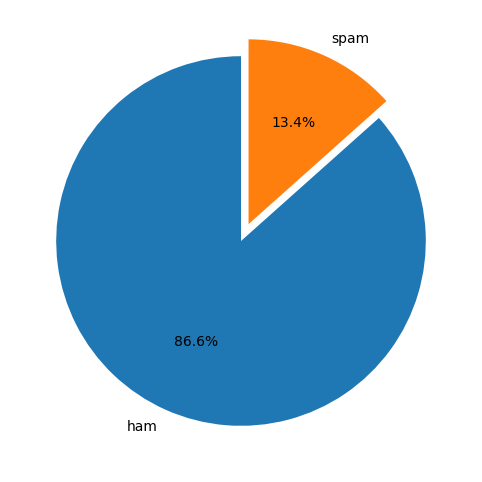

In [49]:
# label distribution using matplotlib
plt.figure(figsize=(8, 6))
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1))